In [1]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,TimeoutException
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Login to Instagram Handle

In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.maximize_window()
time.sleep(2)
driver.get('https://www.instagram.com/')
driver.implicitly_wait(5)

# Login to instagram
a = driver.find_element_by_name("username")
b = driver.find_element_by_name("password")
a.send_keys(username)
b.send_keys(password)
b.submit()

wait = WebDriverWait(driver, 10)  

# Cancelling popups
wait.until(EC.presence_of_element_located((By.XPATH , '//div[starts-with(@class,"cmbtv")]/button')))
driver.find_element_by_xpath('//div[starts-with(@class,"cmbtv")]/button').click()
wait.until(EC.presence_of_element_located((By.XPATH , '//button[contains(@class,"HoLwm")]')))
driver.find_element_by_xpath('//button[contains(@class,"HoLwm")]').click()



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST driver version for 101.0.4951
Driver [C:\Users\Annu\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache


### Check the story of any user. 
### Consider the following Scenarios and print error messages accordingly -
### If You have already seen the story Or The user has no story Or View the story if not yet seen.

In [ ]:
search = driver.find_element_by_xpath("//input[@type='text']")
search.clear()
search.send_keys('user')
driver.find_element_by_partial_link_text("user").click()
a = driver.find_element_by_xpath("//div[contains(@class,'h5uC0')]")
AD = a.get_attribute('aria-disabled')
story = (a.get_attribute('innerHTML').split()[2].split('"')[1] == '249')
if AD == 'true':
    print("User has no story")
else:
    if not story:
        print("Not yet seen.. viewing it")
        a.click()
    else:
        print("Already seen")

### Extract list of followers
#### Example : Top 100 followers of So Delhi

In [81]:
def panel(username):
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(username)
    driver.find_element_by_class_name("-qQT3").click()
    wait.until(EC.presence_of_all_elements_located((By.PARTIAL_LINK_TEXT ,'followers')))
    driver.find_element_by_partial_link_text('followers').click()
def list_of_followers(username):
    panel(username)
    current_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
    l = []
    while True :
        ele = driver.find_elements_by_xpath('//span[contains(@class,"mArmR")]/a')
        for i in ele:
            if len(l) == 100:
                break
            l.append(i.get_attribute('title'))
        driver.execute_script('document.getElementsByClassName("isgrP")[0].scrollTo(0, arguments[0]);', current_height)
        time.sleep(2)
        new_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
        if (len(l)==100) or (new_height == current_height) :
            break
        current_height = new_height
    driver.find_element_by_xpath("//div[contains(@class,'WaOAr')]/button").click()
    return l
print("List of top 100 followers of sodelhi is",list_of_followers('sodelhi'))

List of top 100 followers of sodelhi is ['mohammad_arshad8', 'bipashaaaa_2', 'divyat_', 'awaaaaaraaa', '_agrawal.kartik_', 'ankitkr_911', 'sakship90', 'baghel_king', 'naagarbunty', 'rattancheemaa', 'uditapuri', 'gippies_bakery', 'shrutxz', 'chhabraamit12', 'lxx_raghav', 'deepiinsta', 'vermanaveen__', 'fziansfanpage', 'dilshad_stylist_official', 'sikharr_006', 'harsh_sharma1782', 'rupali_2786', 'avantika_aggrawal', '_ritikasharma27', 'zhen_wan_sying_kshatriya', 'purnima_1805', 'rpvt_3', 'abhyudit19', '___lostboi___', 'manshajain_', 'nirupama_amy', 'sakshi.s__', 'rajveersingh7788', 'funfunnykhej', 'inst._.a._.a', 'have_faithin_mee', 'deepshikhasingh__', 'shalini.1178', 'reshmataneja9', 'crazylazysapien', 'cma_saquib', '_sabir_ansari', 'i_bhavyasethi30', 'aslkhan7109', 'tiya_bora05', 'iam_divay', 'shubhamjha301', 'sakibsaifi161', 'xenophilic_soul', 'd3lhi_', 'aditya_david_', 'kathpal_tanisha', 'kritika_1901', '_ankiisrivastava', 'rahulprajapati8728', 'iambhrt', 'merchantshreya', 'muskan_n

### List of people I am following but don't follow me back

In [ ]:
def list_of_my_followers():
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//div[@class='_47KiJ']/div")))
    driver.find_elements_by_xpath("//div[@class='_47KiJ']/div")[-1].click()
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//a[@class='-qQT3']")))
    driver.find_element_by_xpath('//a[@class="-qQT3"]').click()
    time.sleep(2)
    wait.until(EC.presence_of_all_elements_located((By.PARTIAL_LINK_TEXT ,'followers')))
    driver.find_element_by_partial_link_text('followers').click()
    current_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
    l = []
    while True :
        ele = driver.find_elements_by_xpath('//span[contains(@class,"mArmR")]/a')
        for i in ele:
            l.append(i.get_attribute('title'))
        driver.execute_script('document.getElementsByClassName("isgrP")[0].scrollTo(0, arguments[0]);', current_height)
        time.sleep(1)
        new_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
        if new_height == current_height:
            break
        current_height = new_height
    driver.find_element_by_xpath("//div[contains(@class,'WaOAr')]/button").click()
    return l
def list_of_my_following():
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//div[@class='_47KiJ']/div")))
    driver.find_elements_by_xpath("//div[@class='_47KiJ']/div")[-1].click()
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//a[@class='-qQT3']")))
    driver.find_element_by_xpath('//a[@class="-qQT3"]').click()
    time.sleep(2)
    wait.until(EC.presence_of_all_elements_located((By.PARTIAL_LINK_TEXT ,'following')))
    driver.find_element_by_partial_link_text('following').click()
    current_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
    l = []
    while True :
        ele = driver.find_elements_by_xpath('//span[contains(@class,"mArmR")]/a')
        for i in ele:
            l.append(i.get_attribute('title'))
        driver.execute_script('document.getElementsByClassName("isgrP")[0].scrollTo(0, arguments[0]);', current_height)
        time.sleep(1)
        new_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
        if new_height == current_height:
            break
        current_height = new_height
    driver.find_element_by_xpath("//div[contains(@class,'WaOAr')]/button").click()
    return l
l1 = list_of_my_followers()
l2 = list_of_my_following()
print(set(l2) - set(l1))

### For any another user

In [38]:
def list_of_my_followers(username):
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(username)
    driver.find_element_by_class_name("-qQT3").click()
    wait.until(EC.presence_of_all_elements_located((By.PARTIAL_LINK_TEXT ,'followers')))
    driver.find_element_by_partial_link_text('followers').click()
    current_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
    l = []
    while True :
        ele = driver.find_elements_by_xpath('//span[contains(@class,"mArmR")]/a')
        for i in ele:
            l.append(i.get_attribute('title'))
        driver.execute_script('document.getElementsByClassName("isgrP")[0].scrollTo(0, arguments[0]);', current_height)
        time.sleep(1)
        new_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
        if new_height == current_height:
            break
        current_height = new_height
    driver.find_element_by_xpath("//div[contains(@class,'WaOAr')]/button").click()
    return l
def list_of_my_following(username):
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(username)
    driver.find_element_by_class_name("-qQT3").click()
    wait.until(EC.presence_of_all_elements_located((By.PARTIAL_LINK_TEXT ,'following')))
    driver.find_element_by_partial_link_text('following').click()
    current_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
    l = []
    while True :
        ele = driver.find_elements_by_xpath('//span[contains(@class,"mArmR")]/a')
        for i in ele:
            l.append(i.get_attribute('title'))
        driver.execute_script('document.getElementsByClassName("isgrP")[0].scrollTo(0, arguments[0]);', current_height)
        time.sleep(1)
        new_height = driver.execute_script('return document.getElementsByClassName("isgrP")[0].scrollHeight ;')
        if new_height == current_height:
            break
        current_height = new_height
    driver.find_element_by_xpath("//div[contains(@class,'WaOAr')]/button").click()
    return l
l1 = list_of_my_followers('user')
l2 = list_of_my_following('user')
print(set(l2) - set(l1))

{'chartology_', 'thesarcaxer', 'rxhulsoni_', 'stud.boyss', 'mohak.narang', 'sk_burger', 'shree_shyam_baba._', 'ca.basnamehikafihai', 'ashish.bagrecha', 'shakshi840', '27sayyam', '_vv.creations', 'the_ultimate_trolls_', 'xbitchhmusic', 'ysahil99', 'zeebusinessofficial', 'shooter_9197', 'sarcastic_us', 'elvish_yadav', 'flirtingchats', '_dekhbhai_', 'neeraj____chopra', 'ca_kapil_goyal', 'sarcasmic_troll', 'virat.kohli', 'thug4liffe', 'siyappa.ishq.ka', 'sarcasticlonda2020', 'dreamer_baljeet_saini', 'time4knowledge', 'scrawled.tales', 'official_ydv_006', 'manish_tanwer_official', 'thesquashedstories', 'thesarcaser', 'haq_se_backbencher', 'pranav_.pg', 'arzaan99', 'rajaumerrr', 'khatushyam_ji_darshan', 'anshul.agarwal.94009', 'icaiorg', 'skater_rahul', 'thestockmarketindia', 'solupdates', 'harshbeniwal', 'filmygags', 'gudu_bansal_', 'ashishchanchlani', 'saini_narender000__', 'ankitpaiga2121', 'just.lol.things', 'mridulmadhok', '_aanshita_', 'businessgrowthmentor', 'dipu_kaushik', 'iwritewha

### Typing anything in search bar and print all the names of the Instagram Handles that are displayed in list after typing 
##### Example : Type 'food'

In [71]:
wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
search = driver.find_element_by_xpath("//input[@type='text']")
search.clear()
search.send_keys('food')
print("Names of the Instagram Handles that are displayed in list after typing food")
l = driver.find_elements_by_xpath('//div[starts-with(@class,"fuqBx")]/div/a')
for i in l:
    handle=i.get_attribute('href')
    if 'explore' not in handle:          # this step so that hashtags will not get printed
        h=handle.split('/')[3]
        print(h)

Names of the Instagram Handles that are displayed in list after typing food
foodie_incarnate
tasty.foodrecipes
foodieeemishieee
foody_bliss
yourfoodlab
foodmapjaipur
food
foodiesfeature
the.food_cult
indian_food_recipes5
foodys
chefsmind2021
bisckoo
foodzeee
meghnasfoodmagic
delhi_food_safari
delhiicious
streetfoodrecipe
food_cooking_channel_1234_
food_mood137
foodtalkindia
namasste_india
f4foodi
foodiewe
foodaholic_pragya
mi_nashikkar_
dilsefoodie
foodie_kinny
headovermeals_2
viral_foodie431
foodieee_official
nisha_yogagirl
foodvoodindia
food.lum
foodinsider
foodiesafarii
partnersinfood_
the_food_empire_
food.darzee
flavours.of.mumbai
food_b.a.e
thisisdelhi
foodandwine
oye.foodieee
food.cuisine__
delhifoodnest
fakta_nashik_
girly_n_gluttony


### 3. Opening profile of XYZ username  and following/Unfollowing it

#### Example : So Delhi

In [15]:
# Open profile of “So Delhi”

search = driver.find_element_by_xpath("//input[@type='text']")
search.clear()
search.send_keys('sodelhi')
driver.find_element_by_class_name("-qQT3").click()
print("Profile So Delhi opened")

# Start following it. Print a message if you are already following
try:
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,'//div[contains(@class,"fDxYl")]')))
    d = driver.find_element_by_xpath('//div[contains(@class,"fDxYl")]')
    if d.text == 'Message':
        print("Already followed So Delhi")
    else:
        driver.find_element_by_xpath('//button[contains(@class,"_6VtSN")]').click()
        print("Followed So Delhi")
except NoSuchElementException:
    driver.find_element_by_xpath('//button[contains(@class,"_6VtSN")]').click()
    print("Followed So Delhi")
time.sleep(2)
# After following, unfollow the instagram handle. Print a message if you have already unfollowed.
wait.until(EC.presence_of_all_elements_located((By.XPATH ,'//button[contains(@class,"_6VtSN")]')))
d = driver.find_element_by_xpath('//button[contains(@class,"_6VtSN")]')
if d.text == 'Follow':
    print("Already Unfollowed So Delhi")
else:
    d.click()
    driver.find_element_by_xpath('//button[contains(@class,"aOOlW")]').click()
    print("Unfollowed So Delhi")
    
time.sleep(2)

Profile So Delhi opened
Followed So Delhi
Unfollowed So Delhi


### Like/Unlike posts

In [17]:
search = driver.find_element_by_xpath("//input[@type='text']")
search.clear()
search.send_keys('sodelhi')
driver.find_element_by_class_name("-qQT3").click()
wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//div[contains(@class,'v1Nh3')]/a")))
driver.find_element_by_xpath("//div[contains(@class,'v1Nh3')]/a").click()
for i in range(2):
    e = driver.find_element_by_xpath("//div[contains(@class,'QBdPU ')]/span")
    val = e.get_attribute('innerHTML').split('\"')[1]
    if (val == 'Unlike'):
        print("Already liked")
    else:
        driver.find_element_by_xpath("//span[contains(@class,'fr66n')]/button").click()
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//a[contains(@class,'coreSpriteRightPaginationArrow')]")))
    driver.find_element_by_xpath("//a[contains(@class,'coreSpriteRightPaginationArrow')]").click()
for i in range(2):
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//a[contains(@class,'coreSpriteLeftPaginationArrow')]")))
    driver.find_element_by_xpath("//a[contains(@class,'coreSpriteLeftPaginationArrow')]").click()
    e = driver.find_element_by_xpath("//div[contains(@class,'QBdPU ')]/span")
    val = e.get_attribute('innerHTML').split('\"')[1]
    if (val == 'like'):
        print("Already unliked")
    else:
        driver.find_element_by_xpath("//span[contains(@class,'fr66n')]/button").click()
time.sleep(1)
driver.back()
driver.back()

### Finding out some top insta page in some particular domain and analyze their habits like frequency of posts etc
### Say in case of pages related to food blogging

In [52]:
wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
search = driver.find_element_by_xpath("//input[@type='text']")
search.clear()
search.send_keys('food')
handle = []
l = driver.find_elements_by_xpath('//div[starts-with(@class,"fuqBx")]/div/a')
for i in l:
    li=i.get_attribute('href')
    if 'explore' not in li:
        h=li.split('/')[3]
        if len(handle) != 10:
            handle.append(h)
        else:
            break
            
followers = []
for i in handle:
    count = 0
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
    search = driver.find_element_by_xpath("//input[@type='text']")
    search.clear()
    search.send_keys(i)
    time.sleep(1)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    time.sleep(2)
    d = driver.find_elements_by_xpath('//span[contains(@class,"g47SY")]')[1].get_attribute('title')
    time.sleep(0.2)
    count = int("".join(d.split(',')))
    time.sleep(0.2)
    followers.append([count , i])
followers = sorted(followers,reverse=True)
top_3 = followers[:3]
print(top_3)

[[761170, 'yourfoodlab'], [761170, 'foodie_incarnate'], [146223, 'food']]


### Find the number of posts these handles have done in the previous 2 days

yourfoodlab  ------>  3 posts
foodie_incarnate  ------>  5 posts
food  ------>  0 posts


Text(0, 0.5, 'Num posts in last 2 days')

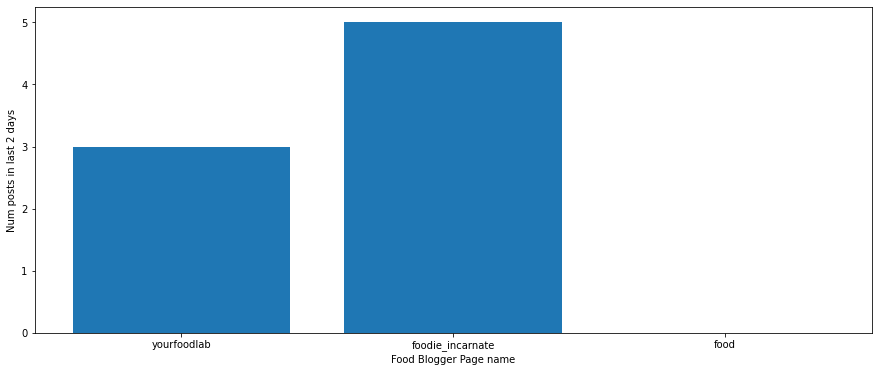

In [58]:
def num_posts():
    driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]/a').click()
    count = 0
    while True:
        time.sleep(0.5)
        d = driver.find_elements_by_class_name('Nzb55')[-1]
        d = d.text.split()
        if int(d[0]) > 2 and d[1] =='DAYS':
            break
        count += 1
        driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]').click()
    driver.find_elements_by_xpath('//button[contains(@class,"wpO6b")]')[-1].click()
    return count

posts = []
for j,i in top_3:
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
    search = driver.find_element_by_xpath("//input[@type='text']")
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    count = num_posts()
    posts.append([count , i])
    
num_posts = []
page_name = []
for i,j in posts:
    num_posts.append(i)
    page_name.append(j)

for i in range(3):
    print(page_name[i]," ------> ",num_posts[i],"posts")

# Depicting this information using graph.

plt.figure(figsize=(15,6))
plt.bar(page_name,num_posts)
plt.xlabel('Food Blogger Page name')
plt.ylabel("Num posts in last 2 days")

### Identifying most used hashtags by these top bloggers and identifying their frequency

In [61]:
def hashtags():
    driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]/a').click()
    hashtag = []
    c = 0
    while c < 5:
        time.sleep(0.5)
        l = driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').find_elements_by_tag_name('a')
        for i in l:
            if (i.text != "") and (i.text[0] == '#'):
                hashtag.append(i.text)
        driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]').click()
        c += 1
    driver.find_elements_by_xpath('//button[contains(@class,"wpO6b")]')[-1].click()
    return hashtag
d = {}
for j,i in top_3:
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
    search = driver.find_element_by_xpath("//input[@type='text']")
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    hashtag = hashtags()
    for i in hashtag:
        d[i] = d.get(i,0) + 1
print(d)

{'#recipe': 4, '#foodie': 10, '#indiancuisine': 4, '#streetfood': 5, '#mumbaifoodie': 2, '#shawarma': 2, '#shawarmalovers': 2, '#shawarmas': 2, '#paneer': 2, '#paneerrecipes': 2, '#paneerlove': 2, '#sanjyotkeer': 4, '#yourfoodlab': 4, '#momo': 1, '#momoslover': 1, '#momos': 1, '#chickenmomos': 1, '#foodporn': 8, '#foodblogger': 8, '#foodphotography': 6, '#indianfood': 3, '#MomoLove': 1, '#YFL': 1, '#YourFoodLab': 1, '#SanjyotKeer': 1, '#samosa': 2, '#samosalover': 1, '#foodstylist': 1, '#monsoon': 1, '#monsoonseason': 1, '#mood': 1, '#foodpic': 6, '#onionsamosa': 1, '#instafood': 2, '#Foodieincarnate': 1, '#Reelitfeelit': 1, '#reelkarofeelkaro': 2, '#reelsinstagram': 2, '#reels': 1, '#matkaroti': 1, '#nagpur': 1, '#uniquefood': 1, '#famousfood': 1, '#foodieincarnate': 4, '#sodelhi': 3, '#foodtalkindia': 2, '#newdelhi': 3, '#delhigram': 2, '#desifood': 1, '#ruralindia': 1, '#santacruz': 1, '#mumbaifood': 1, '#munbaifoodie': 1, '#somumbai': 1, '#pakora': 1, '#indianrecipes': 1, '#vadapav

In [62]:
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1] , reverse = True )}

In [64]:
print("Top 10 hashtags are")
count = 0
for i in d:
    if count < 10:
        print(i , "---------->" , d[i])
        count += 1

Top 10 hashtags are
#foodie ----------> 10
#foodporn ----------> 8
#foodblogger ----------> 8
#foodphotography ----------> 6
#foodpic ----------> 6
#foodlover ----------> 6
#foodgram ----------> 6
#streetfood ----------> 5
#food ----------> 5
#foodpics ----------> 5


### Average likes to followers ratio

### Brief description about calculation
#### Followers : Likes ratio is calculated as follows:
#### Find out the likes of the top 10 posts of the 3 handles obtained earlier.
#### Calculate the average likes for a handle.
#### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
#### Create a bar graph to depict the above obtained information.

In [73]:
def likes():
    time.sleep(2)
    driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]/a').click()
    count_likes = 0
    c = 0
    while c < 10:
        time.sleep(0.5)
        try:
            count = driver.find_element_by_xpath('//section[contains(@class,"EDfFK")]//a/span')
            count = int(count.text.replace(',',''))
            print("Likes on post ",c+1, " : " , count)
        except NoSuchElementException:
            count = int(driver.find_element_by_xpath('//section[contains(@class,"EDfFK")]//span/span').text.replace(',',''))
            print("Views on post ",c+1, " : " , count)
        count_likes += count
        driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]').click()
        c += 1
    driver.find_elements_by_xpath('//button[contains(@class,"wpO6b")]')[-1].click()
    return count_likes/10
l = []
for k,i in top_3:
    wait.until(EC.presence_of_all_elements_located((By.XPATH ,"//input[@type='text']")))
    search = driver.find_element_by_xpath("//input[@type='text']")
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break
    print("-------------",i.upper(),"----------------")
    avg_likes = likes()
    print("Average likes : ", avg_likes)
    ratio = avg_likes/k
    print("Average likes to followers ratio is ", ratio)
    l.append(ratio)
    print("============================================")
print(l)

------------- YOURFOODLAB ----------------
Views on post  1  :  7050
Likes on post  2  :  27642
Views on post  3  :  215466
Views on post  4  :  144587
Likes on post  5  :  41772
Views on post  6  :  1000404
Likes on post  7  :  38519
Views on post  8  :  171909
Views on post  9  :  356539
Views on post  10  :  450617
Average likes :  245450.5
Average likes to followers ratio is  0.32246475820119025
------------- FOODIE_INCARNATE ----------------
Likes on post  1  :  31917
Likes on post  2  :  29441
Views on post  3  :  326568
Likes on post  4  :  37487
Likes on post  5  :  29426
Views on post  6  :  807084
Likes on post  7  :  61303
Likes on post  8  :  26862
Views on post  9  :  754453
Likes on post  10  :  48249
Average likes :  215279.0
Average likes to followers ratio is  0.28282643824638387
------------- FOOD ----------------
Likes on post  1  :  237
Likes on post  2  :  277
Likes on post  3  :  119
Likes on post  4  :  187
Likes on post  5  :  125
Likes on post  6  :  82
Likes o

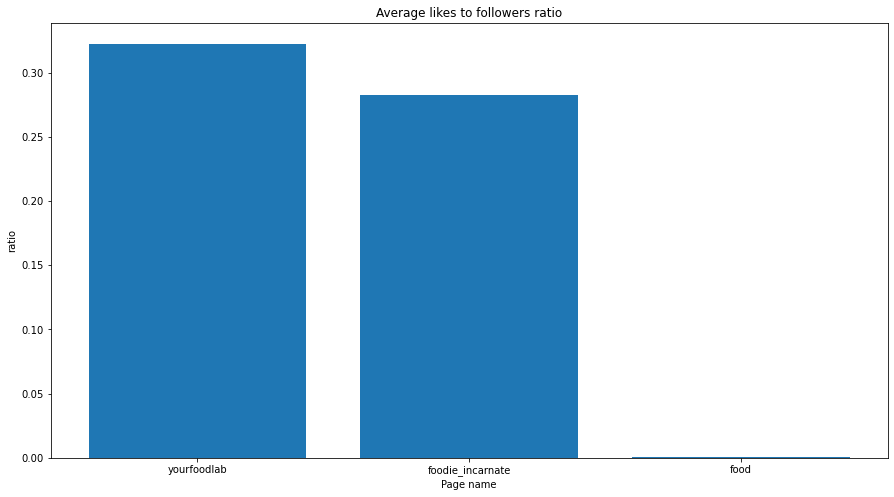

In [80]:
top_3 = [i[1] for i in top_3]
plt.figure(figsize=(15,8))
plt.bar(top_3 , l)
plt.title("Average likes to followers ratio")
plt.xlabel("Page name")
plt.ylabel("ratio")
plt.show()